# Volcano plots of upregulated and downregulated miRNAs in TMVs

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

CELL_TYPE = "LOX"

In [76]:
df = pd.read_csv("./Differential_analysis_results/{}_cell_vs_{}_TMV.csv".format(CELL_TYPE, CELL_TYPE))
print(df.head())
print(df.shape)

     Unnamed: 0     logFC    logCPM          LR         PValue            FDR
0  hsa-miR-4521 -8.882130  8.440294  549.978639  1.272439e-121  8.194510e-119
1  hsa-miR-4488  6.423788  8.091394  507.283879  2.472679e-112  7.962028e-110
2  hsa-miR-5701 -4.368221  8.829854  403.525003   9.410095e-90   2.020034e-87
3  hsa-miR-3182  4.641778  9.534222  383.914370   1.748851e-85   2.815650e-83
4  hsa-miR-4497  4.439212  8.024208  347.456076   1.517472e-77   1.954504e-75
(644, 6)


In [3]:
df["negLog10Pvalue"] = -np.log10(df.FDR)
# This is saying p value is less than 0.005
df_negLog10Pvalue = df[df.negLog10Pvalue >= 2.3][["Unnamed: 0", "logCPM", "logFC","negLog10Pvalue"]]
print(df_negLog10Pvalue.head())
print(df_negLog10Pvalue.shape)

     Unnamed: 0    logCPM     logFC  negLog10Pvalue
0  hsa-miR-4521  8.440294 -8.882130      118.086477
1  hsa-miR-4488  8.091394  6.423788      109.098976
2  hsa-miR-5701  8.829854 -4.368221       86.694641
3  hsa-miR-3182  9.534222  4.641778       82.550421
4  hsa-miR-4497  8.024208  4.439212       74.708963
(176, 4)


In [4]:
# Need to look at the min and max for plotting the volcano plots

df_negLog10Pvalue.describe()

,logCPM,logFC,negLog10Pvalue
count,176.000000,176.000000,176.000000
mean,6.871691,0.074251,12.820595
std,3.331730,3.213668,18.847849
min,1.731945,-9.141204,2.350286
25%,4.133634,-1.635568,3.076851
50%,6.459142,-0.663197,5.100063
75%,9.221435,2.130589,12.133016
max,18.545432,6.943252,118.086477


In [5]:
# Further refined the up and down regulated miRNAs using log2 fold change > 2 or <-2 meaning a 4 fold change minimum

up_regulated_miRs = df_negLog10Pvalue[(df_negLog10Pvalue['logFC']>2)]
down_regulated_miRs = df_negLog10Pvalue[(df_negLog10Pvalue['logFC']<-2)]

In [6]:
# Assign the dots in the scatter plot

# Gray dots for all miRNAs
y=np.array(df['negLog10Pvalue'])
x=np.array(df['logFC'])

# Red dots for upregulated miRNAs
yRed=np.array(up_regulated_miRs['negLog10Pvalue'])
xRed=np.array(up_regulated_miRs['logFC'])

# Green dots for down regulated miRNAs
yGreen=np.array(down_regulated_miRs['negLog10Pvalue'])
xGreen=np.array(down_regulated_miRs['logFC'])

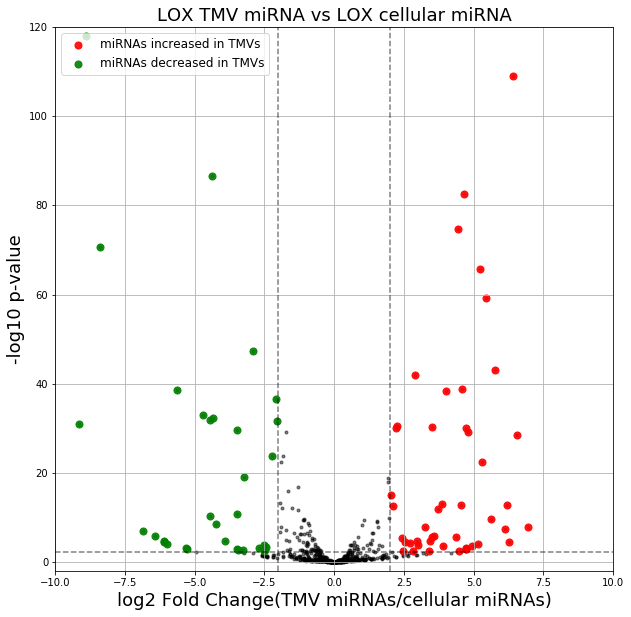

In [79]:
# Volcano plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, alpha=0.5,marker='.', color='black')
ax.scatter(xRed, yRed, alpha=0.9, marker='o',color='red', s=50, label='miRNAs increased in TMVs')
ax.scatter(xGreen, yGreen, alpha=0.9, marker='o',color='green',s=50, label='miRNAs decreased in TMVs')
ax.set_xlim((-10, 10))
ax.set_ylim((-2, 120))
ax.set_title(CELL_TYPE+" TMV miRNA vs "+CELL_TYPE+" cellular miRNA", fontsize=18)
plt.xlabel('log2 Fold Change(TMV miRNAs/cellular miRNAs)',fontsize=18)
plt.ylabel('-log10 p-value',fontsize=18)
ax.grid(True)
ax.legend(loc='upper left',prop={'size':'large'},)
plt.axvline(2, color='black', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.axvline(-2, color='black', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.axhline(2.3, color='black', linestyle='dashed', linewidth=1.5, alpha=0.5)

In [10]:
up_regulated_miRs

,Unnamed: 0,logCPM,logFC,negLog10Pvalue
1,hsa-miR-4488,8.091394,6.423788,109.098976
3,hsa-miR-3182,9.534222,4.641778,82.550421
4,hsa-miR-4497,8.024208,4.439212,74.708963
6,hsa-miR-7704,9.861972,5.212947,65.783489
7,hsa-miR-3135b,6.867515,5.442237,59.176282
9,hsa-miR-3960,5.399468,5.746728,43.150451
10,hsa-miR-619-5p,8.716645,2.893368,41.932097
11,hsa-miR-4516,5.644086,4.591315,38.821406
13,hsa-miR-4448,9.947436,3.994658,38.462793
20,hsa-miR-3184-3p,11.289709,2.256032,30.577554


# Functional analysis of the abundant upregulated miRNAs

In [65]:
up_regulated_abundant_miRs = up_regulated_miRs[up_regulated_miRs.logCPM > 5]
up_regulated_abundant_miRs

,Unnamed: 0,logCPM,logFC,negLog10Pvalue
1,hsa-miR-4488,8.091394,6.423788,109.098976
3,hsa-miR-3182,9.534222,4.641778,82.550421
4,hsa-miR-4497,8.024208,4.439212,74.708963
6,hsa-miR-7704,9.861972,5.212947,65.783489
7,hsa-miR-3135b,6.867515,5.442237,59.176282
9,hsa-miR-3960,5.399468,5.746728,43.150451
10,hsa-miR-619-5p,8.716645,2.893368,41.932097
11,hsa-miR-4516,5.644086,4.591315,38.821406
13,hsa-miR-4448,9.947436,3.994658,38.462793
20,hsa-miR-3184-3p,11.289709,2.256032,30.577554


In [82]:
up_regulated_abundant_miRs.to_csv("./{} up_regulated_abundant_miRs.csv".format(CELL_TYPE))